<a href="https://colab.research.google.com/github/Varun9213/Data-Science-and-Decision-Making/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sagihaider/CE888_2021.git

Cloning into 'CE888_2021'...
remote: Enumerating objects: 381, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 381 (delta 120), reused 30 (delta 17), pack-reused 190
Receiving objects: 100% (381/381), 20.57 MiB | 25.28 MiB/s, done.
Resolving deltas: 100% (190/190), done.


In [2]:
from zipfile import ZipFile
import tensorflow as tf
import keras
import os, cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with ZipFile("/content/CE888_2021/Lab_8/data.zip", 'r') as file:
  file.extractall()

In [4]:
df = pd.DataFrame(columns=["filename", "class"])
root = "/content/data"
for cls in os.listdir(root):
  p = root+"/"+cls
  for fn in os.listdir(p):
    df = df.append({"filename": cls+"/"+fn, "class": cls}, ignore_index=True)

In [5]:
df.head()

,filename,class
0,cats/cat.139.jpg,cats
1,cats/cat.187.jpg,cats
2,cats/cat.134.jpg,cats
3,cats/cat.194.jpg,cats
4,cats/cat.87.jpg,cats


In [26]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(df, test_size=0.2)

In [53]:
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True, 
                                                     rotation_range=90,
                                                     width_shift_range=0.2,
                                                     shear_range = 0.1)
train_ds = datagen.flow_from_dataframe(dataframe=train, directory=root, target_size=(224,224))
valid_ds = datagen.flow_from_dataframe(dataframe=valid, directory=root, target_size=(224,224))

Found 646 validated image filenames belonging to 4 classes.
Found 162 validated image filenames belonging to 4 classes.


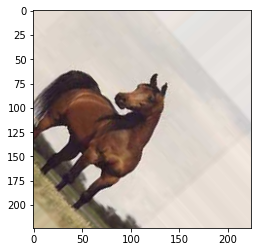

In [54]:
img, lbl = train_ds.next()
plt.imshow(img[2])

**Task - 1**

In [56]:
img_input = tf.keras.Input(shape=(224, 224, 3))
base = tf.keras.applications.ResNet50(include_top=True, input_tensor=img_input, weights='imagenet')
base.trainable = False
x = base.output
preds = tf.keras.layers.Dense(4, activation="softmax")(x)

model = tf.keras.Model(inputs = base.input, outputs=preds)

model.compile(keras.optimizers.Adam(lr=0.001),loss="categorical_crossentropy", metrics=["accuracy"])

In [57]:
STEP_SIZE_TRAIN=train_ds.n//train_ds.batch_size
STEP_SIZE_VALID=valid_ds.n//valid_ds.batch_size
model.fit_generator(generator=train_ds,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_ds,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 18s 730ms/step - loss: 1.3866 - accuracy: 0.2800 - val_loss: 1.3860 - val_accuracy: 0.2625
Epoch 2/10
20/20 [==============================] - 13s 652ms/step - loss: 1.3865 - accuracy: 0.2391 - val_loss: 1.3862 - val_accuracy: 0.2688
Epoch 3/10
20/20 [==============================] - 13s 652ms/step - loss: 1.3862 - accuracy: 0.2466 - val_loss: 1.3867 - val_accuracy: 0.2937
Epoch 4/10
20/20 [==============================] - 13s 650ms/step - loss: 1.3863 - accuracy: 0.2726 - val_loss: 1.3868 - val_accuracy: 0.2250
Epoch 5/10
20/20 [==============================] - 13s 651ms/step - loss: 1.3856 - accuracy: 0.2762 - val_loss: 1.3868 - val_accuracy: 0.2375
Epoch 6/10
20/20 [==============================] - 13s 641ms/step - loss: 1.3860 - accuracy: 0.2772 - val_loss: 1.3865 - val_accuracy: 0.2562
Epoch 7/10
20/20 [==============================] - 13s 652ms/step - loss: 1.3858 - accuracy: 0.2397 - val_loss: 1.3868 - val_accuracy: 0.2313

**Task - 2**

In [60]:
base = tf.keras.applications.ResNet50(include_top=False, input_shape=(224,224,3), weights='imagenet')
x = base.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, activation="elu")(x)
preds = tf.keras.layers.Dense(4, activation="softmax")(x)

model = tf.keras.Model(inputs = base.input, outputs=preds)
base.trainable = False

model.compile(keras.optimizers.Adam(lr=0.0001),loss="categorical_crossentropy", metrics=["accuracy"])

In [62]:
STEP_SIZE_TRAIN=train_ds.n//train_ds.batch_size
STEP_SIZE_VALID=valid_ds.n//valid_ds.batch_size
model.fit_generator(generator=train_ds,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_ds,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=15)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
20/20 [==============================] - 14s 673ms/step - loss: 1.0133 - accuracy: 0.5489 - val_loss: 1.1274 - val_accuracy: 0.5250
Epoch 2/15
20/20 [==============================] - 13s 651ms/step - loss: 1.0455 - accuracy: 0.5668 - val_loss: 1.1172 - val_accuracy: 0.5250
Epoch 3/15
20/20 [==============================] - 13s 666ms/step - loss: 1.0763 - accuracy: 0.5163 - val_loss: 1.0962 - val_accuracy: 0.5312
Epoch 4/15
20/20 [==============================] - 13s 673ms/step - loss: 1.0428 - accuracy: 0.5212 - val_loss: 1.0852 - val_accuracy: 0.5562
Epoch 5/15
20/20 [==============================] - 13s 655ms/step - loss: 1.0084 - accuracy: 0.5309 - val_loss: 1.0850 - val_accuracy: 0.5437
Epoch 6/15
20/20 [==============================] - 13s 649ms/step - loss: 1.0024 - accuracy: 0.5505 - val_loss: 1.0537 - val_accuracy: 0.5562
Epoch 7/15
20/20 [==============================] - 13s 650ms/step - loss: 0.9955 - accuracy: 0.5814 - val_loss: 1.0494 - val_accuracy: 0.5312